### Step 1

Load the file data/gapminder_total_fertility.csv into pandas.

In [1]:
import pandas as pd

fert = pd.read_csv('Jupyter/01_repositories/logistic-lemongrass-student-code/01_week/07_long_vs_wide_format/_RES/gapminder_total_fertility.csv', index_col=0)

In [2]:
print(fert.head())
print(fert.tail())

                       1800  1801  1802  1803  1804  1805  1806  1807  1808  \
Total fertility rate                                                          
Abkhazia                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan            7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
Akrotiri and Dhekelia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
Algeria                6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99   

                       1809  ...  2006  2007  2008  2009  2010  2011  2012  \
Total fertility rate         ...                                             
Abkhazia                NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan            7.00  ...  6.70  6.46  6.20  5.93  5.66  5.40  5.14   
Akrotiri and Dhekelia   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                4.60  ...  1.85  1.80  1.76  1.74

### Step 2

Proceed in the same way with the file data/gapminder_lifeexpectancy.xlsx. Save it in a DataFrame with the name life. Use the function pandas.read_excel() to read in the excel file.

In [3]:
life = pd.read_excel('Jupyter/01_repositories/logistic-lemongrass-student-code/01_week/07_long_vs_wide_format/_RES/gapminder_lifeexpectancy.xlsx', index_col=0)

In [4]:
print(life.head())
print(life.tail())

                        1800   1801   1802   1803   1804   1805   1806   1807  \
Life expectancy                                                                 
Abkhazia                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Afghanistan            28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14   
Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Albania                35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
Algeria                28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

                        1808   1809  ...  2007  2008  2009  2010  2011  2012  \
Life expectancy                      ...                                       
Abkhazia                 NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan            28.13  28.12  ...  52.4  52.8  53.3  53.6  54.0  54.4   
Akrotiri and Dhekelia    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                35.40  35

### Step 3

Check whether both tables have the same size and shape.

In [5]:
print(life.shape)
print(fert.shape)

(260, 217)
(260, 216)


### Step 4

Take a look at the columns of both tables:

In [6]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [7]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

One table has columns as strings, the other has integer numbers. To merge the tables, we need to convert both into the same format. First, we create a list of years as integers.

In [8]:
ncol = [int(x) for x in fert.columns]

and use this list as the new columns:

In [9]:
fert.set_axis(axis=1, labels=ncol, inplace=True)

Check with fert.columns whether the transformation was successful.

In [10]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

### Step 5

To obtain nice column names, you can also create a hierarchical index. For that, we convert both tables to the long format:

In [11]:
sfert = fert.stack()
slife = life.stack()

In [12]:
sfert

Total fertility rate      
Afghanistan           1800    7.00
                      1801    7.00
                      1802    7.00
                      1803    7.00
                      1804    7.00
                              ... 
Zimbabwe              2011    3.64
                      2012    3.56
                      2013    3.49
                      2014    3.41
                      2015    3.35
Length: 43412, dtype: float64

In [13]:
slife

Life expectancy      
Afghanistan      1800    28.21
                 1801    28.20
                 1802    28.19
                 1803    28.18
                 1804    28.17
                         ...  
South Sudan      2012    56.00
                 2013    56.00
                 2014    56.10
                 2015    56.10
                 2016    56.10
Length: 43857, dtype: float64

The variables sfert and slife now have the type pd.Series. Multiple Series can be converted to a pd.DataFrame, using a dictionary with the values:

In [14]:
d = {'fertility': sfert, 'lifeexp': slife}
df2 = pd.DataFrame(data=d)

In [15]:
df2.tail(20)

fertility  lifeexp
Zimbabwe 2007       3.90    46.40
         2008       3.85    47.30
         2009       3.79    48.00
         2010       3.72    49.10
         2011       3.64    51.60
         2012       3.56    54.20
         2013       3.49    55.70
         2014       3.41    57.00
         2015       3.35    59.30
         2016        NaN    61.69
Åland    1997        NaN    78.90
         1998        NaN    81.00
         1999        NaN    78.25
         2000        NaN    80.00
         2001        NaN    80.83
         2002        NaN    81.80
         2003        NaN    80.63
         2004        NaN    79.88
         2005        NaN    80.00
         2006        NaN    80.10

### Step 6

Repeat the steps above to add data from the file data/gapminder_population.xlsx.

In [16]:
population = pd.read_excel('Jupyter/01_repositories/logistic-lemongrass-student-code/01_week/07_long_vs_wide_format/_RES/gapminder_population.xlsx', index_col=0)

In [17]:
print(population.shape)

(275, 81)


In [18]:
population

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Northern Marianas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Georgia and the South Sandwich Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
population.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [20]:
spopulation = population.stack()

In [21]:
spopulation

Total population               
Afghanistan                1800    3280000.0
                           1810    3280000.0
                           1820    3323519.0
                           1830    3448982.0
                           1840    3625022.0
                                     ...    
Sint Maarten (Dutch part)  2011      33979.0
                           2012      35134.0
                           2013      36442.0
                           2014      37696.0
                           2015      38745.0
Length: 20176, dtype: float64

In [22]:
d = {'fertility': sfert, 'lifeexp': slife, 'total population': spopulation}
df2 = pd.DataFrame(data=d)

In [23]:
df2

fertility  lifeexp  total population
Afghanistan 1800        7.0    28.21         3280000.0
            1801        7.0    28.20               NaN
            1802        7.0    28.19               NaN
            1803        7.0    28.18               NaN
            1804        7.0    28.17               NaN
...                     ...      ...               ...
Åland       2006        NaN    80.10           26923.0
            2007        NaN      NaN           26923.0
            2008        NaN      NaN           26923.0
            2009        NaN      NaN           26923.0
            2010        NaN      NaN           26923.0

[47688 rows x 3 columns]

### Step 7

The huge DataFrame is easier to convert to the right format, if we first interpret all indices (rows and columns) as row indices:

In [24]:
df3 = df2.stack()

In [25]:
df3

Afghanistan  1800  fertility                 7.00
                   lifeexp                  28.21
                   total population    3280000.00
             1801  fertility                 7.00
                   lifeexp                  28.20
                                          ...    
Åland        2006  total population      26923.00
             2007  total population      26923.00
             2008  total population      26923.00
             2009  total population      26923.00
             2010  total population      26923.00
Length: 107445, dtype: float64

Finally we can convert the long table back to a wide one. For that we create new columns from the 1st and 3rd level of the index (the country names and attributes):

In [26]:
df4 = df3.unstack((0,2))

In [27]:
df4

Afghanistan                          Akrotiri and Dhekelia   Albania  \
       fertility lifeexp total population      total population fertility   
1800        7.00   28.21        3280000.0                   NaN      4.60   
1801        7.00   28.20              NaN                   NaN      4.60   
1802        7.00   28.19              NaN                   NaN      4.60   
1803        7.00   28.18              NaN                   NaN      4.60   
1804        7.00   28.17              NaN                   NaN      4.60   
...          ...     ...              ...                   ...       ...   
2012        5.14   54.40       29726803.0                   NaN      1.76   
2013        4.90   54.80       30682500.0                   NaN      1.77   
2014        4.68   54.90       31627506.0                   NaN      1.78   
2015        4.47   53.80       32526562.0                   NaN      1.78   
2016         NaN   52.72              NaN                   NaN       NaN   

                                Algeria                           ...  \
     lifeexp total population fertility lifeexp total population  ...   
1800    35.4         410445.0      6.99   28.82        2503218.0  ...   
1801    35.4              NaN      6.99   28.82              NaN  ...   
1802    35.4              NaN      6.99   28.82              NaN  ...   
1803    35.4              NaN      6.99   28.82              NaN  ...   
1804    35.4              NaN      6.99   28.82              NaN  ...   
...      ...              ...       ...     ...              ...  ...   
2012    77.5        2880667.0      2.82   76.20       37439427.0  ...   
2013    77.7        2883281.0      2.80   76.30       38186135.0  ...   
2014    77.9        2889676.0      2.76   76.30       38934334.0  ...   
2015    78.0        2896679.0      2.71   76.40       39666519.0  ...   
2016    78.1              NaN       NaN   76.50              NaN  ...   

                Yemen       Yugoslavia    Zambia                           \
     total population total population fertility lifeexp total population   
1800        2593000.0              NaN      6.71    32.6         747000.0   
1801              NaN              NaN      6.71    32.6              NaN   
1802              NaN              NaN      6.71    32.6              NaN   
1803              NaN              NaN      6.71    32.6              NaN   
1804              NaN              NaN      6.71    32.6              NaN   
...               ...              ...       ...     ...              ...   
2012       24882792.0              NaN      5.73    54.7       14786581.0   
2013       25533217.0              NaN      5.69    55.6       15246086.0   
2014       26183676.0              NaN      5.64    56.3       15721343.0   
2015       26832215.0              NaN      5.59    56.7       16211767.0   
2016              NaN              NaN       NaN    57.1              NaN   

      Zimbabwe                                     Åland          
     fertility lifeexp total population total population lifeexp  
1800      6.75   33.70        1085814.0              NaN     NaN  
1801      6.75   33.70              NaN              NaN     NaN  
1802      6.75   33.70              NaN              NaN     NaN  
1803      6.75   33.70              NaN              NaN     NaN  
1804      6.75   33.70              NaN              NaN     NaN  
...        ...     ...              ...              ...     ...  
2012      3.56   54.20       14565482.0              NaN     NaN  
2013      3.49   55.70       14898092.0              NaN     NaN  
2014      3.41   57.00       15245855.0              NaN     NaN  
2015      3.35   59.30       15602751.0              NaN     NaN  
2016       NaN   61.69              NaN              NaN     NaN  

[217 rows x 667 columns]

The zero stands for the first element of an index. With the value 1 all year numbers would end up as columns.

Now df4 is a table, with years on the left side and life expectancy and fertility for all countries on top.

### Step 8

Now you can select specific columns and plot them:

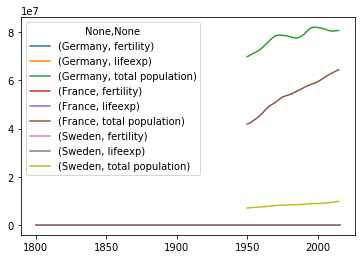

In [28]:
import pylab as plt
df4[['Germany', 'France', 'Sweden']].plot()

To create a scatterplot, we extract the columns to plot from df3:

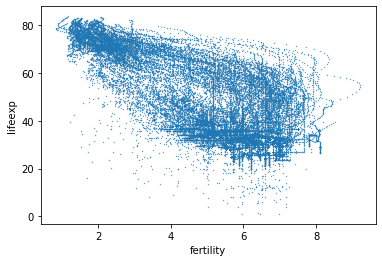

In [29]:
df5 = df3.unstack(2)
df5.plot.scatter('fertility', 'lifeexp', s=0.1)

In [30]:
df5

fertility  lifeexp  total population
Afghanistan 1800        7.0    28.21         3280000.0
            1801        7.0    28.20               NaN
            1802        7.0    28.19               NaN
            1803        7.0    28.18               NaN
            1804        7.0    28.17               NaN
...                     ...      ...               ...
Åland       2006        NaN    80.10           26923.0
            2007        NaN      NaN           26923.0
            2008        NaN      NaN           26923.0
            2009        NaN      NaN           26923.0
            2010        NaN      NaN           26923.0

[47688 rows x 3 columns]

Using stack and unstack you can also select a year. That makes the plot easier to read:

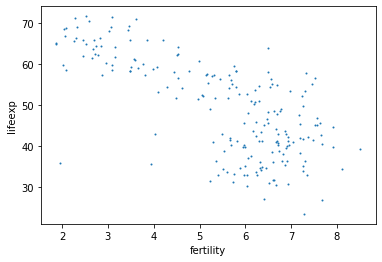

In [63]:
df6 = df3.unstack(1)
df6 = df6[1950]
df6 = df6.unstack(1)
df6.plot.scatter('fertility', 'lifeexp', s=1)

### Step 9

Now we can improve our graphics, e.g. color each country differently:

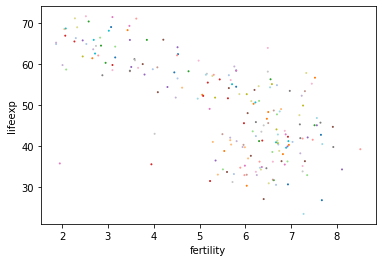

In [54]:
cmap = plt.get_cmap('tab20', lut = len(df6)).colors
df6.plot.scatter('fertility', 'lifeexp', s=1, c=cmap)

#### Hint: The lut parameter allows you to control the length of the color array (which by default is 20), and in the above code we ensure that it is same length as the index of our dataframe. 

or use a third column with the size of the dots:

In [55]:
df6['total population']

Afghanistan               7752118.0
Akrotiri and Dhekelia       10661.0
Albania                   1263171.0
Algeria                   8872247.0
American Samoa              18937.0
                            ...    
Yemen                     4402320.0
Yugoslavia               16285527.0
Zambia                    2316950.0
Zimbabwe                  2746854.0
Åland                       21649.0
Name: total population, Length: 256, dtype: float64

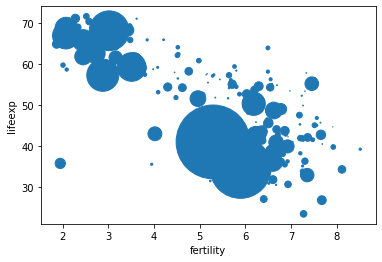

In [56]:
df6.plot.scatter('fertility', 'lifeexp', s=df6['total population']*0.00001)

### Step 10

To create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps).

In [62]:
df6

,fertility,lifeexp,total population
Afghanistan,7.67,26.85,7752118.0
Akrotiri and Dhekelia,NaN,NaN,10661.0
Albania,5.80,54.48,1263171.0
Algeria,7.65,42.77,8872247.0
American Samoa,NaN,NaN,18937.0
...,...,...,...
Yemen,7.27,23.51,4402320.0
Yugoslavia,NaN,NaN,16285527.0
Zambia,6.71,42.85,2316950.0
Zimbabwe,6.75,48.46,2746854.0


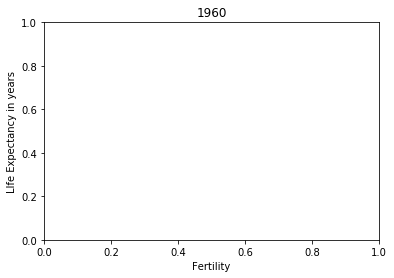

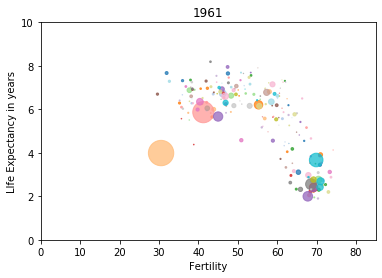

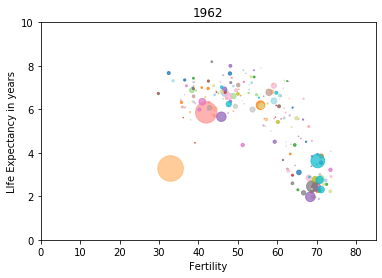

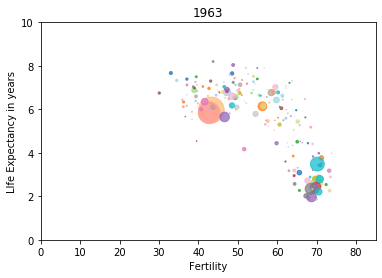

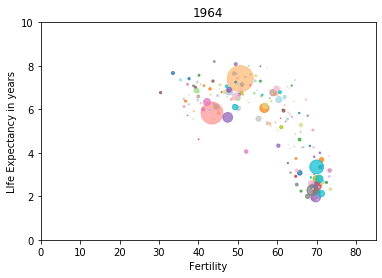

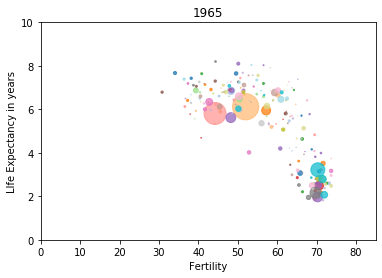

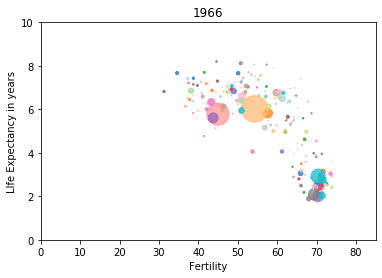

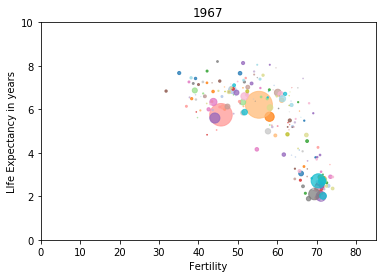

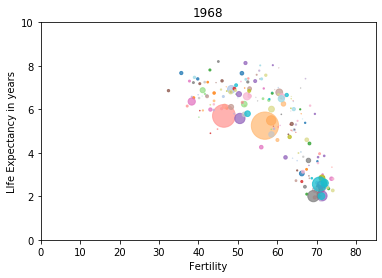

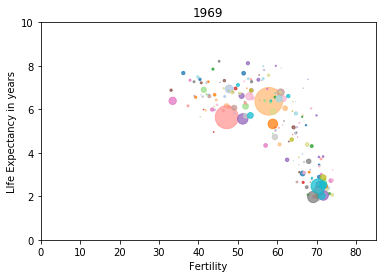

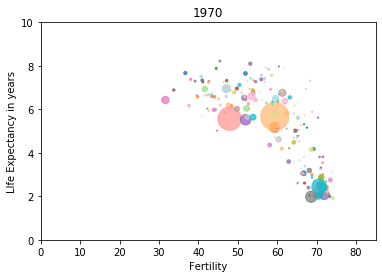

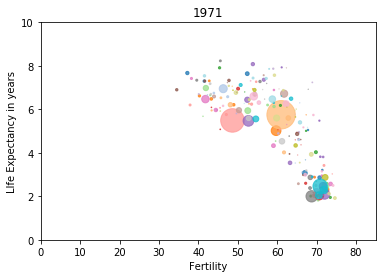

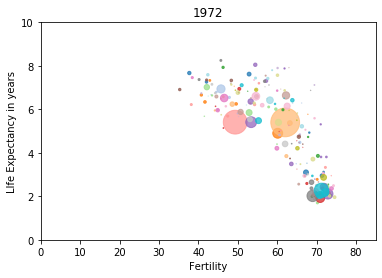

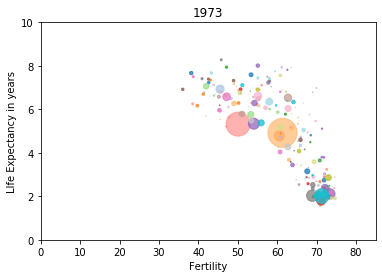

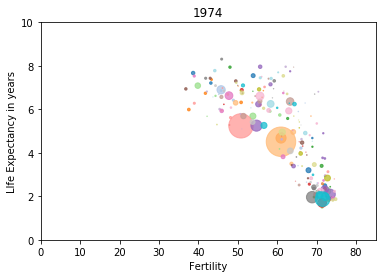

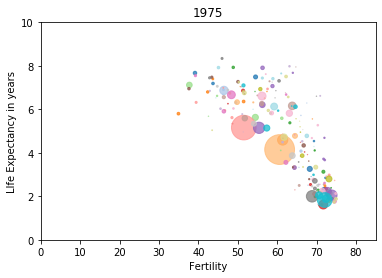

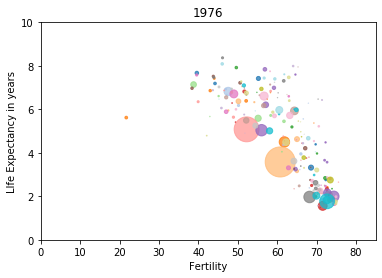

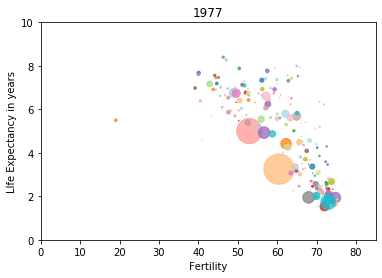

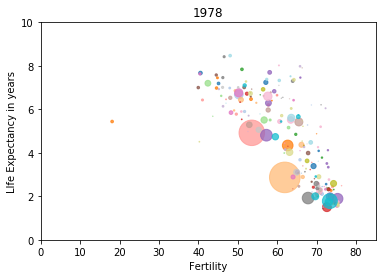

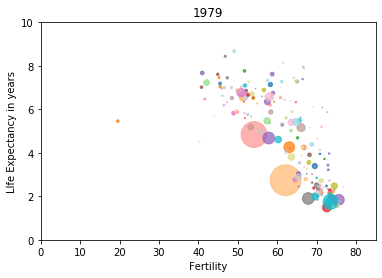

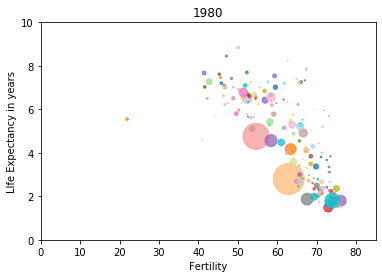

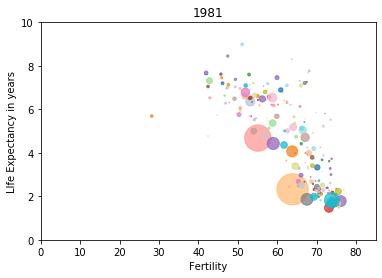

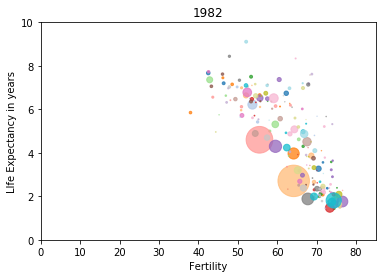

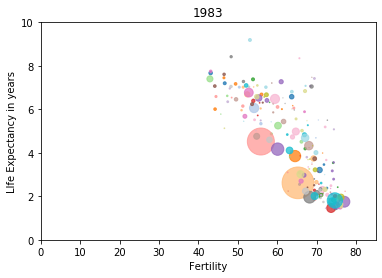

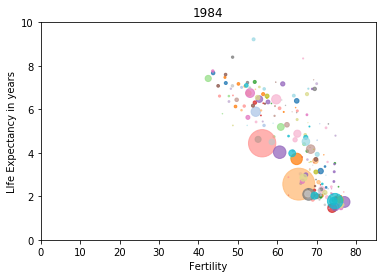

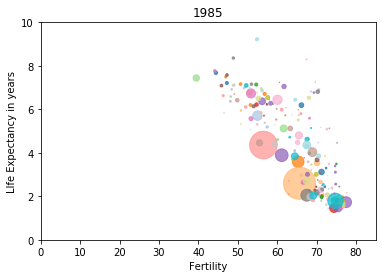

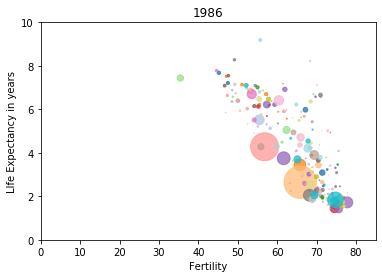

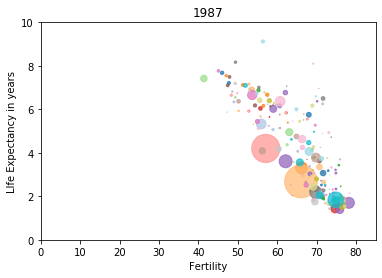

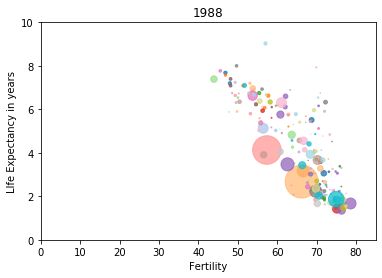

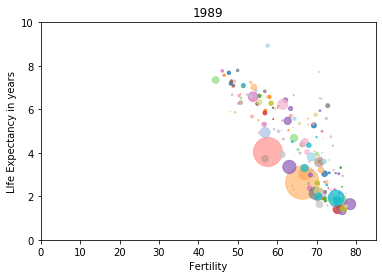

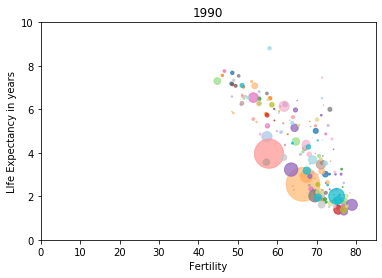

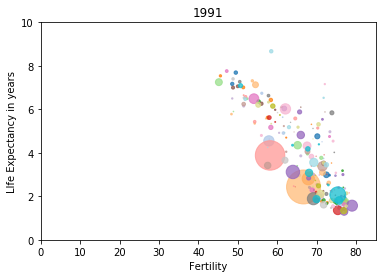

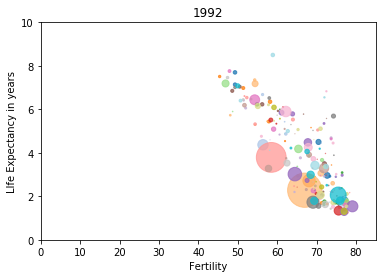

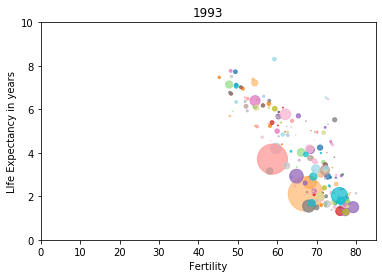

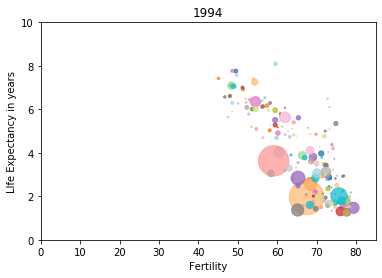

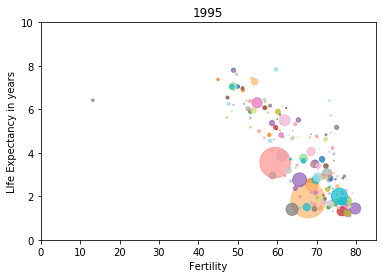

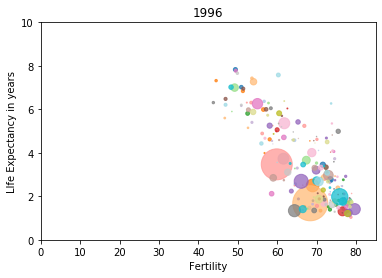

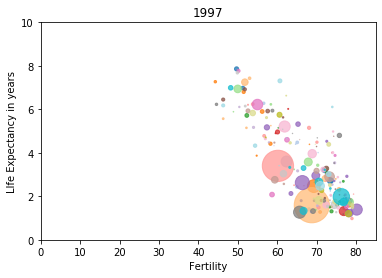

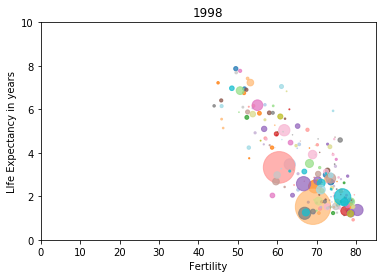

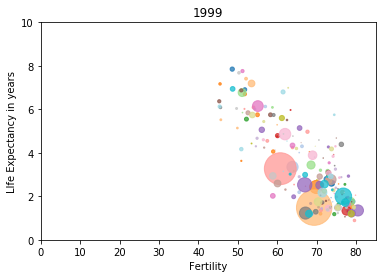

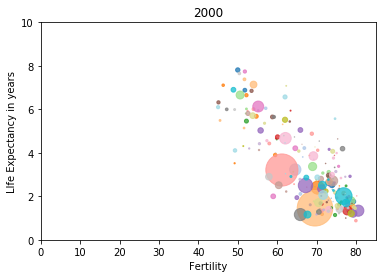

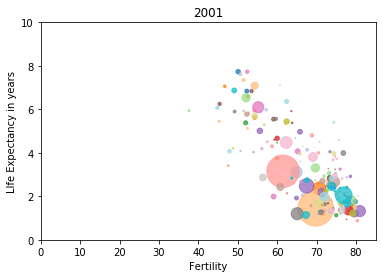

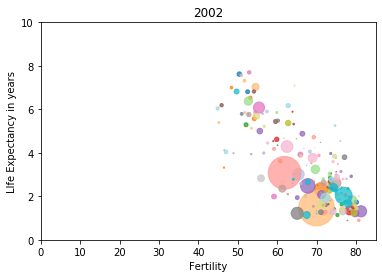

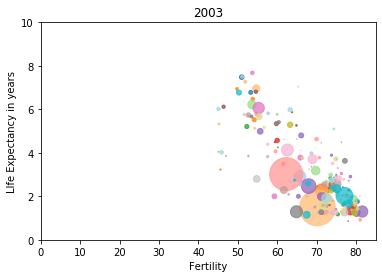

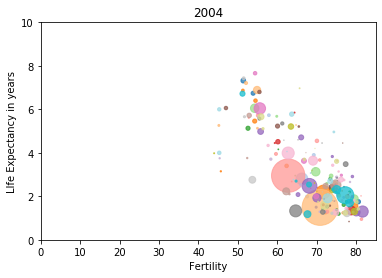

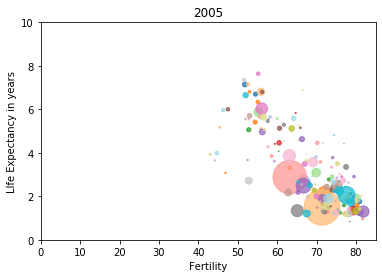

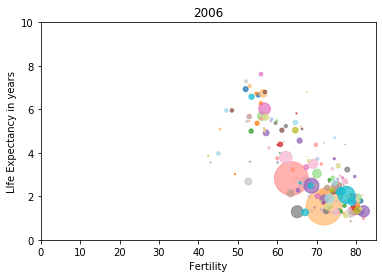

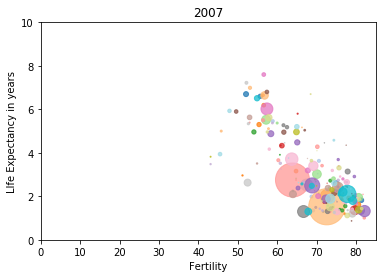

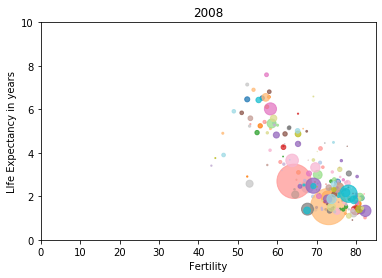

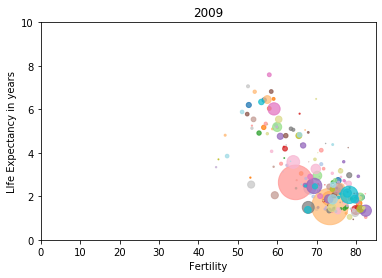

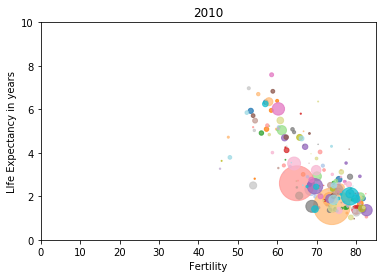

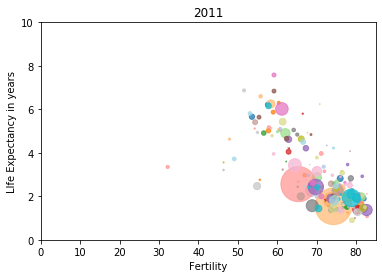

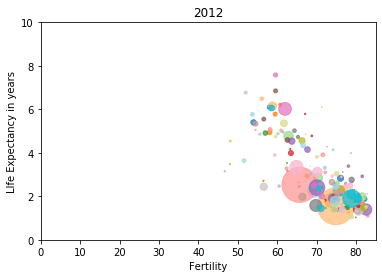

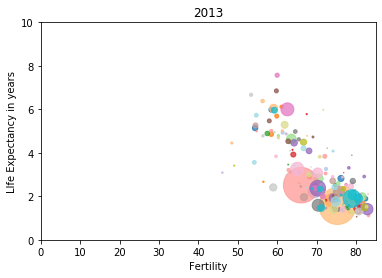

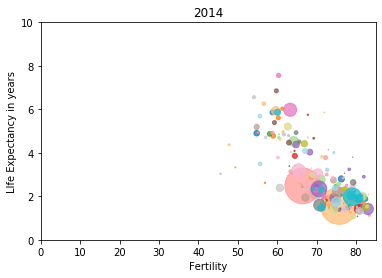

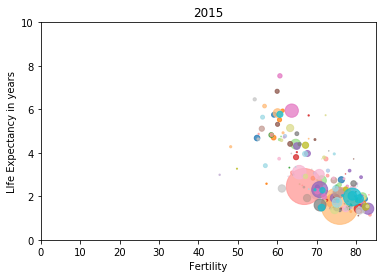

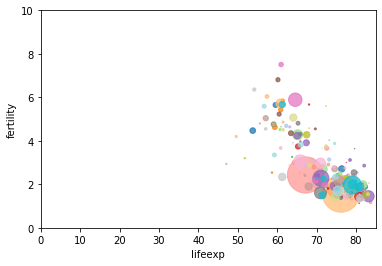

In [72]:
for i in range(1960, 2016):
    df6 = df3.unstack(1)
    df6 = df6[i]
    df6 = df6.unstack(1)
    cmap = plt.get_cmap('tab20', lut = len(df6)).colors
    plt.title(i)
    plt.xlabel('Fertility')
    plt.ylabel('LIfe Expectancy in years')
    df6.plot.scatter('lifeexp', 'fertility', s=df6['total population']*0.000001, alpha = 0.75, c=cmap)
    plt.axis((0,85,0,10))
    plt.savefig('Jupyter/01_repositories/logistic-lemongrass-student-code/01_week/07_long_vs_wide_format/_RES/01_Scatterplot_PNGs/lifeexp_' + str(i) + '.png', dpi=150)


### Step 11

Adjust the plot, so that the size of the symbols represents the population from the gapminder dataset.

### Step 12

Install the Python module imageio, by typing in the terminal:

In [69]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


Adjust the following code example and execute it:

In [73]:
import imageio

images = []

for i in range(1960, 2016):
    filename = 'Jupyter/01_repositories/logistic-lemongrass-student-code/01_week/07_long_vs_wide_format/_RES/01_Scatterplot_PNGs/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('Jupyter/01_repositories/logistic-lemongrass-student-code/01_week/07_long_vs_wide_format/_RES/output.gif', images, fps=10)